In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [3]:
# find the path
path = os.getcwd()
print('This path dir is: ', path)

# find the parent dir
parent_path = os.path.dirname(path)
print('The parent path dir is: ', parent_path)

# # 构造sub_folder的绝对路径
# sub_folder_path = os.path.join(parent_path, 'sub_folder')
# 将sub_folder的路径添加到sys.path中
sys.path.append(parent_path)

# find the train_data folder
train_data_path = os.path.join(parent_path, 'Data/Alexnet_layer_data')
print('The training data are saved in: ', train_data_path)

# find all the folders in the train_data folder
train_data_folders = os.listdir(train_data_path)
print('The folders in the training data folder are: ', train_data_folders)

This path dir is:  /root/GreenAI/GPU/universal/Analysis_layers
The parent path dir is:  /root/GreenAI/GPU/universal
The training data are saved in:  /root/GreenAI/GPU/universal/Data/Alexnet_layer_data
The folders in the training data folder are:  ['Time_Layers.npy', 'Time_AllEpochs.npy', 'TrainTime.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'Energy_AllEpochs.npy']


In [4]:
# find the files name that in the subfolder
files = os.listdir(train_data_path)
print('The files in the subfolder are: ', files)

The files in the subfolder are:  ['Time_Layers.npy', 'Time_AllEpochs.npy', 'TrainTime.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'Energy_AllEpochs.npy']


In [5]:
Epoch = 10

In [6]:
# read all the .npy files from the subfolder
Time_AllEpochs = np.load(os.path.join(train_data_path, 'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6) # contains the time to device time, forward time, loss calculation time, backward time, optimizer time, and model test time
Energy_AllEpochs = np.load(os.path.join(train_data_path, 'Energy_AllEpochs.npy'), allow_pickle=True) # save each epoch's energy consumption
Time_Layers = np.load(os.path.join(train_data_path, 'Time_Layers.npy'), allow_pickle=True).reshape(Epoch,6) # evluation of training accuracy and loss
TrainTime = np.load(os.path.join(train_data_path, 'TrainTime.npy'), allow_pickle=True) # save each epoch's training time
# TimeEpoch = np.load(os.path.join(train_data_path, 'TimeEpoch.npy'), allow_pickle=True) # save each epoch's time to device time
TrainLoss = np.load(os.path.join(train_data_path, 'TrainLoss.npy'), allow_pickle=True) # save each epoch's training loss
TestAcc = np.load(os.path.join(train_data_path, 'TestAcc.npy'), allow_pickle=True) # save each epoch's testing accuracy
TrainAcc = np.load(os.path.join(train_data_path, 'TrainAcc.npy'), allow_pickle=True) # save each epoch's training accuracy

#### Time_Layers

In [7]:
# print the shape of the data
print(Time_Layers.shape)
print(Time_Layers) # Conv2d, ReLU, MaxPool2d, Linear, Dropout, Flatten

(10, 6)
[[2.00583315 0.41825819 0.28199887 0.28242493 0.07495022 0.01695824]
 [1.74854517 0.39265251 0.27488112 0.26931953 0.06433344 0.01628828]
 [1.72529507 0.38075614 0.26974249 0.26356697 0.06237507 0.01497769]
 [1.72350907 0.38088036 0.27003264 0.26192856 0.06062531 0.01500487]
 [1.72634506 0.38174605 0.27028704 0.26089978 0.06076789 0.01533079]
 [1.76573372 0.39520073 0.28159237 0.27509642 0.06512666 0.01663709]
 [1.72741723 0.38002014 0.26972985 0.26119161 0.05911827 0.01501274]
 [1.72043872 0.37834382 0.26815891 0.25949407 0.05886292 0.01485825]
 [1.72163272 0.38251233 0.26875806 0.26161742 0.06070328 0.0149672 ]
 [1.72396278 0.38359976 0.26894784 0.25996757 0.0591054  0.01500368]]


In [8]:
# calculate the average time for each layer
Time_Layers_Avg = np.mean(Time_Layers, axis=0)
print(Time_Layers_Avg)

[1.75887127 0.387397   0.27241292 0.26555068 0.06259685 0.01550388]


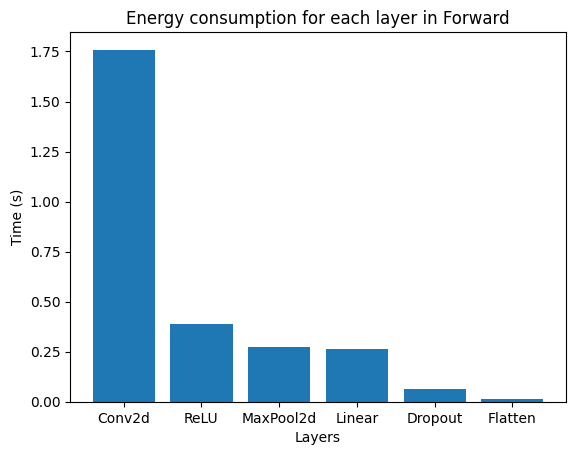

In [9]:
# plot the average time for each layer
fig, ax = plt.subplots()
labels = ['Conv2d', 'ReLU', 'MaxPool2d', 'Linear', 'Dropout', 'Flatten']
ax.bar(labels, Time_Layers_Avg)
ax.set_xlabel('Layers')
ax.set_ylabel('Time (s)')
ax.set_title('Time consumption for each layer in Forward')
plt.show()

#### Time_AllEpochs

In [10]:
print('For each epoch, the time of each layer is: \n', 
      'The Time to Device time of all epoch: \n', Time_AllEpochs[:,0].T, '\n',
      'The Forward time of all epoch: \n', Time_AllEpochs[:,1].T, '\n',
      'The Calculate Loss time of all epoch: \n', Time_AllEpochs[:,2].T, '\n',
      'The Backward time of all epoch: \n', Time_AllEpochs[:,3].T, '\n',
      'The Optimize time of all epoch: \n', Time_AllEpochs[:,4].T, '\n',
      'The Test time of all epoch: \n', Time_AllEpochs[:,5].T)

For each epoch, the time of each layer is: 
 The Time to Device time of all epoch: 
 [3.15350199 2.8587079  2.45457673 2.45024419 2.38584542 2.99371696
 2.28887177 2.20188308 2.44206715 2.39733052] 
 The Forward time of all epoch: 
 [3.08042359 2.76602006 2.71671343 2.71198082 2.71537662 2.79938698
 2.71248984 2.70015669 2.71019101 2.71058702] 
 The Calculate Loss time of all epoch: 
 [0.12140822 0.07711196 0.07122612 0.07162976 0.06783581 0.08260679
 0.06979489 0.06683707 0.06848812 0.06763768] 
 The Backward time of all epoch: 
 [4.74051547 4.61402106 4.55138302 4.56706285 4.55353379 4.61396122
 4.58095217 4.57181954 4.55913877 4.5941751 ] 
 The Optimize time of all epoch: 
 [0.44783425 0.41118813 0.39546967 0.39544296 0.39650774 0.41756082
 0.39816284 0.39292717 0.38981128 0.38965511] 
 The Test time of all epoch: 
 [2.78629446 2.46487927 2.60223603 2.34126902 2.35212398 2.54753304
 2.40648603 2.30520892 2.40208602 2.3546865 ]


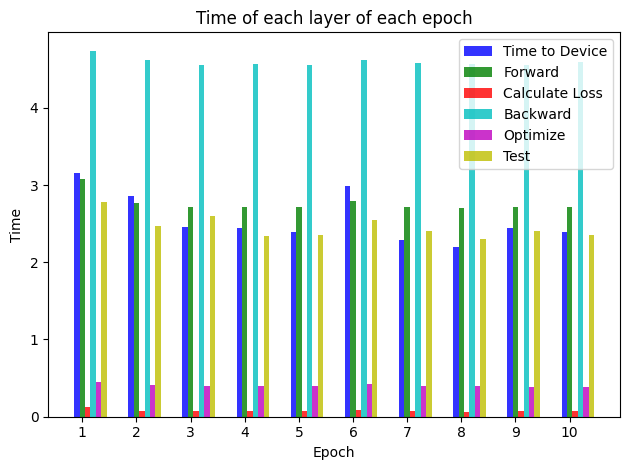

In [11]:
# plot each epoch's time to device, forward, calculate loss, backward, optimize, test using matplotlib with bar chart in one figure
fig, ax = plt.subplots()
index = np.arange(10)
bar_width = 0.1
opacity = 0.8
rects1 = plt.bar(index, Time_AllEpochs[:,0].T, bar_width, alpha=opacity, color='b', label='Time to Device')
rects2 = plt.bar(index+bar_width, Time_AllEpochs[:,1].T, bar_width, alpha=opacity, color='g', label='Forward')
rects3 = plt.bar(index+2*bar_width, Time_AllEpochs[:,2].T, bar_width, alpha=opacity, color='r', label='Calculate Loss')
rects4 = plt.bar(index+3*bar_width, Time_AllEpochs[:,3].T, bar_width, alpha=opacity, color='c', label='Backward')
rects5 = plt.bar(index+4*bar_width, Time_AllEpochs[:,4].T, bar_width, alpha=opacity, color='m', label='Optimize')
rects6 = plt.bar(index+5*bar_width, Time_AllEpochs[:,5].T, bar_width, alpha=opacity, color='y', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Time of each layer of each epoch')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()
plt.tight_layout()
plt.show()

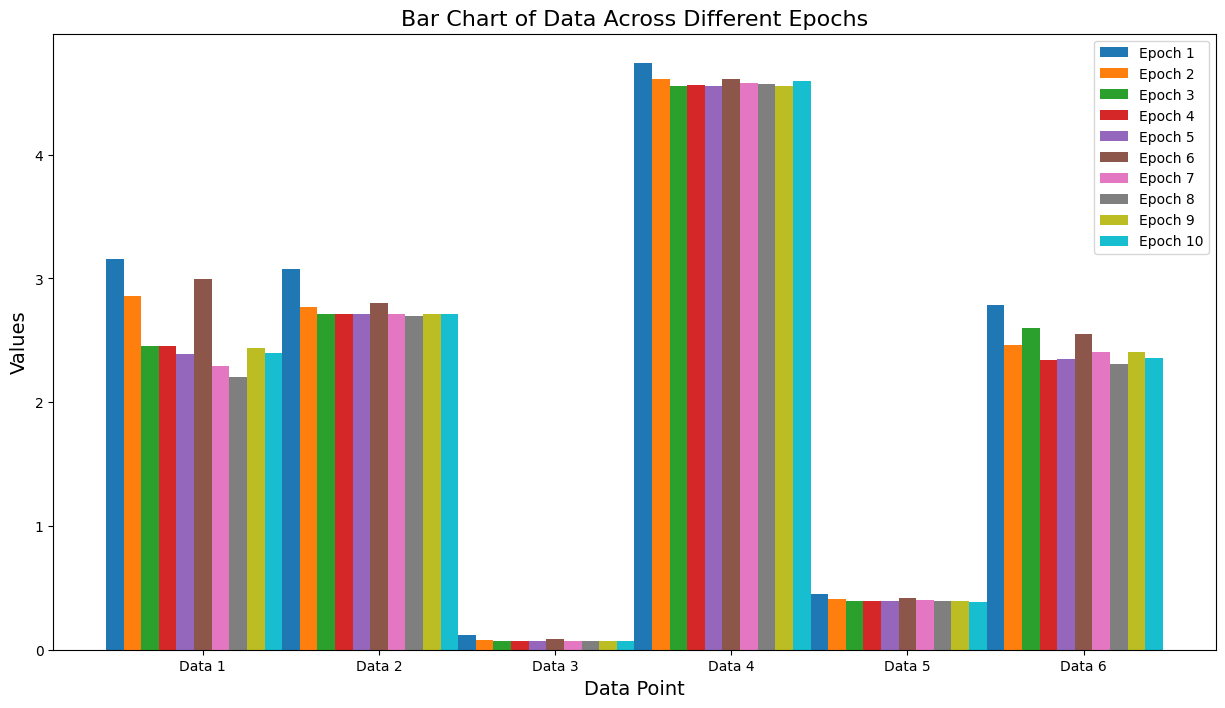

In [12]:
# Number of epochs
epochs = Time_AllEpochs.shape[0]
# Setting up the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
# Width of a bar
bar_width = 0.1
# Creating an index for each set of bars
index = np.arange(Time_AllEpochs.shape[1])
# Plotting each epoch's data
for i in range(epochs):
    ax.bar(index + i*bar_width, Time_AllEpochs[i, :], bar_width, label=f'Epoch {i+1}')
# Adding labels and title
ax.set_xlabel('Data Point', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Bar Chart of Data Across Different Epochs', fontsize=16)
ax.set_xticks(index + bar_width * epochs / 2)
ax.set_xticklabels([f'Data {i+1}' for i in range(Time_AllEpochs.shape[1])])
ax.legend()
# Showing the plot
plt.show()

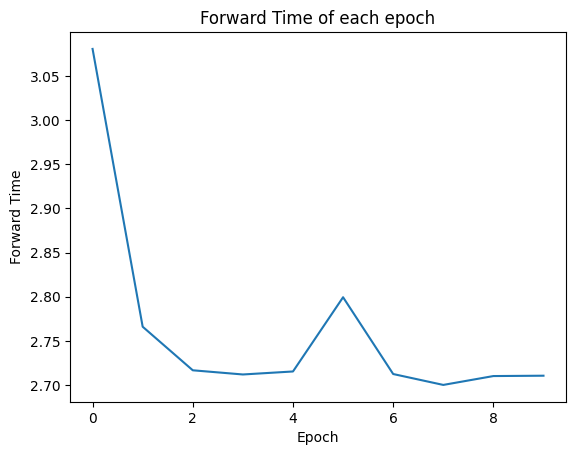

In [13]:
# plot the Forward time of each epoch using matplotlib with line in one figure
plt.plot(Time_AllEpochs[:,1].T)
plt.xlabel('Epoch')
plt.ylabel('Forward Time')
plt.title('Forward Time of each epoch')
plt.show()

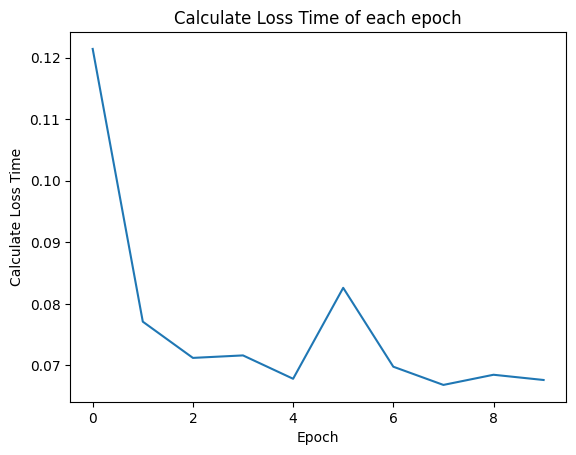

In [14]:
# plot the Calculate Loss of each epoch using matplotlib with line in one figure
plt.plot(Time_AllEpochs[:,2].T)
plt.xlabel('Epoch')
plt.ylabel('Calculate Loss Time')
plt.title('Calculate Loss Time of each epoch')
plt.show()

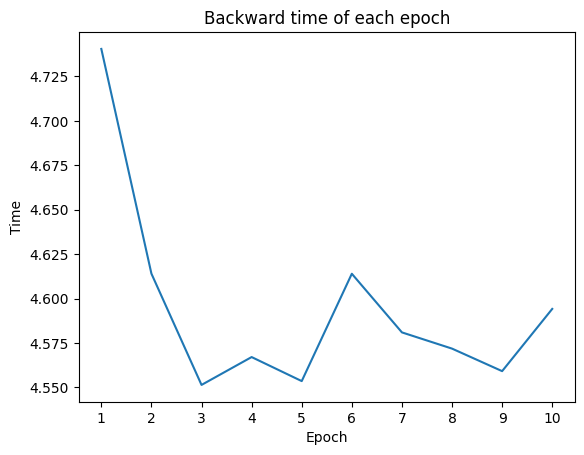

In [15]:
# plot the Backward time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllEpochs[:,3].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Backward time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

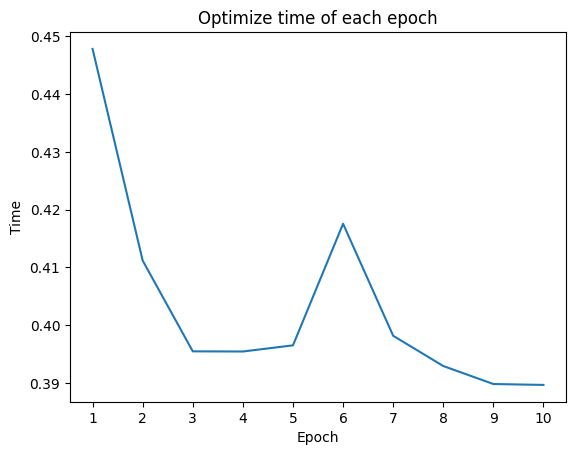

In [16]:
# plot the Optimize time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllEpochs[:,4].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Optimize time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

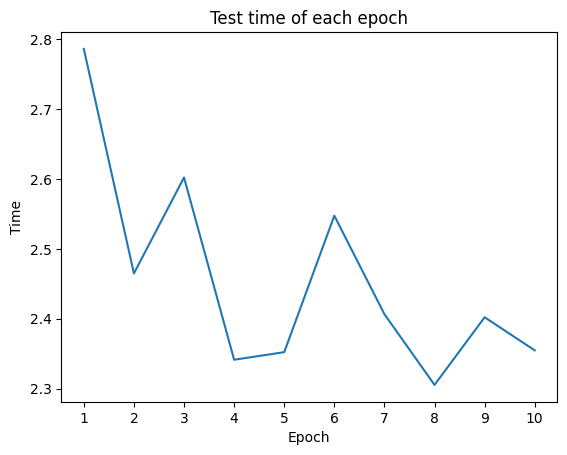

In [17]:
# plot the Test time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllEpochs[:,5].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Test time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

#### Energy_AllEpochs 

In [18]:
print(Energy_AllEpochs.shape)

(10, 1)


In [19]:
for epoch in range(len(Energy_AllEpochs)):
    print('Epoch: ', epoch+1, 'The total recorded time is: ', len(Energy_AllEpochs[epoch][0]))

Epoch:  1 The total recorded time is:  20
Epoch:  2 The total recorded time is:  19
Epoch:  3 The total recorded time is:  18
Epoch:  4 The total recorded time is:  17
Epoch:  5 The total recorded time is:  17
Epoch:  6 The total recorded time is:  19
Epoch:  7 The total recorded time is:  17
Epoch:  8 The total recorded time is:  17
Epoch:  9 The total recorded time is:  17
Epoch:  10 The total recorded time is:  18


In [20]:
# calculate the total energy consumption of each epoch
Energy_AllEpochs_Total = []
for epoch in range(len(Energy_AllEpochs)):
    Energy_AllEpochs_Total.append(sum(Energy_AllEpochs[epoch][0]))
    print(f'The total energy consumption of each epoch is: {Energy_AllEpochs_Total[epoch]:.3f}')

The total energy consumption of each epoch is: 3374.340
The total energy consumption of each epoch is: 3421.560
The total energy consumption of each epoch is: 3388.100
The total energy consumption of each epoch is: 3304.430
The total energy consumption of each epoch is: 3358.850
The total energy consumption of each epoch is: 3521.050
The total energy consumption of each epoch is: 3351.400
The total energy consumption of each epoch is: 3380.180
The total energy consumption of each epoch is: 3400.580
The total energy consumption of each epoch is: 3490.210


#### train acc and test acc

In [21]:
print(TestAcc)

[0.7393 0.7911 0.8255 0.832  0.8575 0.8438 0.8695 0.8677 0.8741 0.8808]


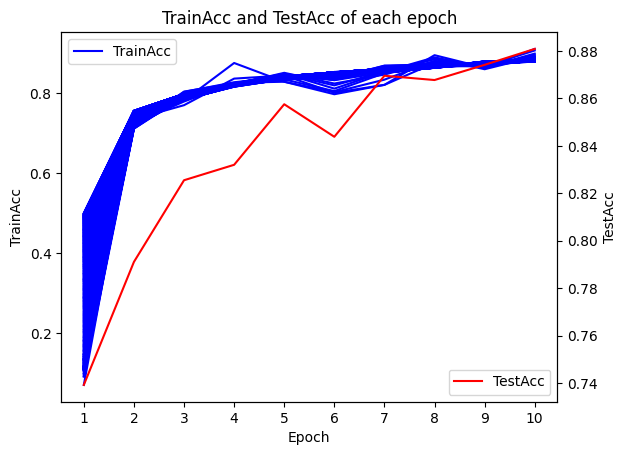

In [22]:
# plot the TrainAcc and TestAcc of each epoch using matplotlib with line in one figure, the left y-axis is for TrainAcc and the right y-axis is for TestAcc
# add the legend for TrainAcc and TestAcc, put it to the bottom right
fig, ax1 = plt.subplots()
index = np.arange(10)
plt.plot(index, TrainAcc, 'b-')
plt.xlabel('Epoch')
plt.ylabel('TrainAcc')
plt.legend(['TrainAcc'], loc='upper left')
plt.title('TrainAcc and TestAcc of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))

ax2 = ax1.twinx()
plt.plot(index, TestAcc, 'r-')
plt.ylabel('TestAcc')
plt.legend(['TestAcc'], loc='lower right')
plt.show()
